#### Project Overview

We have been tasked with creating a predictive model of a buildings heating and cooling loads (Energy Efficiency). Our client, ABC Commercial Real Estate holdings has asked us to provide them with this predictive model so they can get and idea of the heating and cooling load of their entire portfolio without actually having to rate each building. There is a huge $ saving potential if we can provide them with an accurate way of predciting these metrics based off of the existing building characteristics they already have.

We have been provide with the building characteristics and the Heating and Cooling loads of 768 buildings in their portfolio which have already been rated. We will use this data to come out with our predictive model to help ABC Commercial Real Estate estimate their remaining 1,500 buildings in their portfolio.

#### Executive Summary

From our exploration of the data we concluded that many of the variables do correlate well to the heating and cooling loads of the buildings and thus would be suitable to build a multiple linear regression model in order to predict the heating and cooling loads of ABC's other buildings.

After runing our model we can conclude that it scores very well in predicting the actual heating a cooling loads of a building and would thus be suitable for use to assess ABC's remaining 1,500 buildings. The models R2 scores, which rates the accuracy of the load predictions vs actual loads, rated at 0.93 for heating and 0.88 for cooling out of the highest possible score of 1. These more then meet the typical threshold of 0.8 so we can conclude that this model is viable for the clients requirements.

Although our model is accurate in predicting a buildings heating and coling loads it needs to be understood that the model does have some faults. Based on our analysis of the results, it tends to under rate the heating and cooling loads by an average of 1.5 points and almost always under rates a buildings loads when the predicted heating or cooling load is 20 or less.

#### Load, Inspect and Clean Data

In [1]:
#Load Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv('energy_efficiency_data.csv')

In [2]:
#Inspect Data
#print(df.describe())
#Check for null values
null_rows  = df[df.isnull().any(axis=1)]
#No null values
#From describe the data looks clean so we will proceed to EDA

#### Exploratory Data Analysis

1.From EDA we can see the cooling and heating distributions are bimodal with a right skew. Additionally the heating and cooling loads are not distributed in the same way but when we plot on a scatter plot and view correlation figures on a heat map they are strongly correlated at 0.98.

2.The strongest correlation between building features and the heating and cooling loads is overall height with a correlation of 0.9. The weakest correlation is orientation at 0.0026 for heating and 0.0014 for cooling.

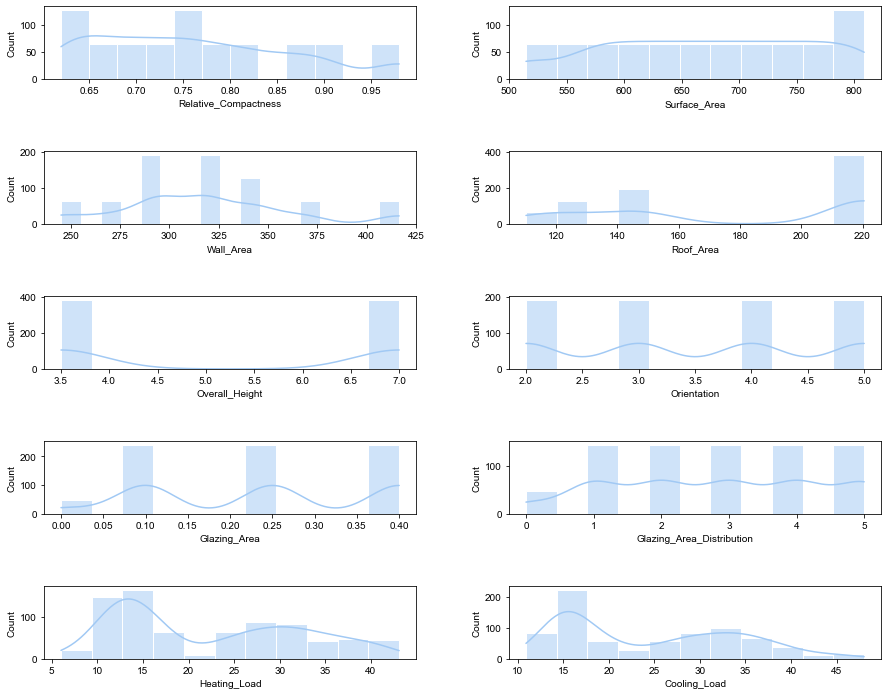

<Figure size 432x288 with 0 Axes>

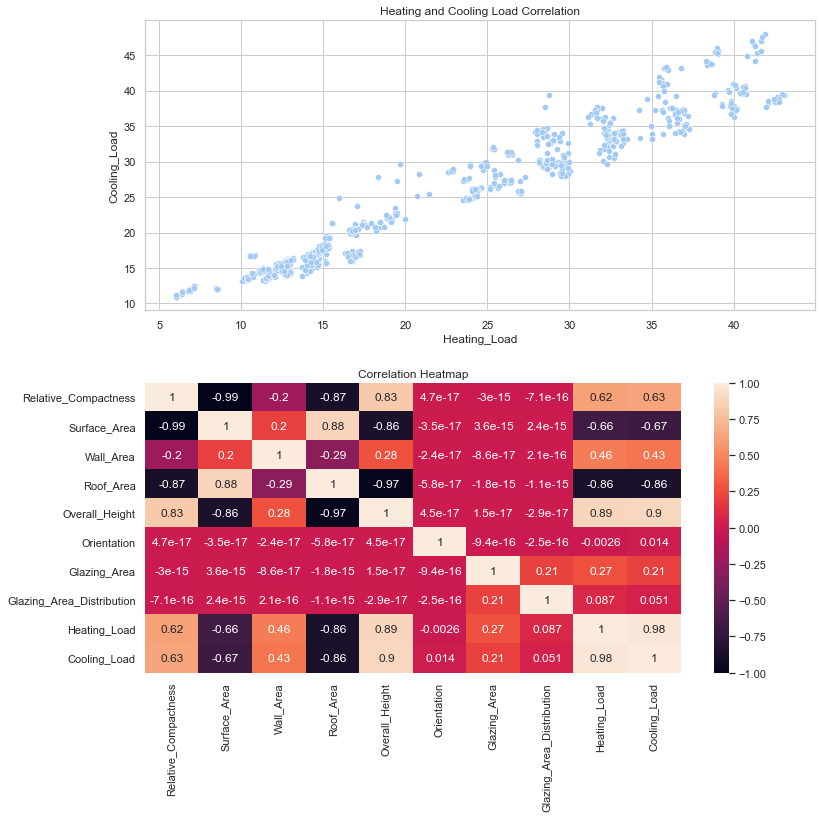

<Figure size 432x288 with 0 Axes>

In [3]:
#Explore data distributions of columns
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=1, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

sns.histplot(data=df, x="Relative_Compactness", kde=True, ax=axes[0,0])
sns.histplot(data=df, x="Surface_Area", kde=True, ax=axes[0,1])
sns.histplot(data=df, x="Wall_Area", kde=True, ax=axes[1,0])
sns.histplot(data=df, x="Roof_Area", kde=True, ax=axes[1,1])
sns.histplot(data=df, x="Overall_Height", kde=True, ax=axes[2,0])
sns.histplot(data=df, x="Orientation", kde=True, ax=axes[2,1])
sns.histplot(data=df, x="Glazing_Area", kde=True, ax=axes[3,0])
sns.histplot(data=df, x="Glazing_Area_Distribution", kde=True, ax=axes[3,1])
sns.histplot(data=df, x="Heating_Load", kde=True, ax=axes[4,0])
sns.histplot(data=df, x="Cooling_Load", kde=True, ax=axes[4,1])

plt.show()
plt.clf()

#Set up subplots for heating and cooling correlation analysis
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
fig.subplots_adjust(hspace=0.25, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

#plot heating and cooling load to compare relationship
sns.scatterplot(data=df, x='Heating_Load', y='Cooling_Load', ax=axes[0]).set_title("Heating and Cooling Load Correlation")

#plot heat map to determine correlation amongst values
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, annot=True, ax=axes[1]).set_title("Correlation Heatmap")
plt.show()
plt.clf()

#### Linear Regression Model Analysis

Based on our models below the R2 score of the heating model was 0.93 for training and 0.88 for test data. This tells us that the model is predicting heating loads with a fair amount of accuracy across the test data but not as accurately as the training data, which is likely due the sample sizes of each. 

The R2 scores for the cooling model were below the heating model with training score of 0.89 and test score of 0.85 but followed a similar pattern to the heating model in that test score was lower then training.

When we plotted our residuals vs predicted it appeared that the model was under estimating the actual heating and cooling loads for buildings with lower loads but for the higher load buildings the model was both under and overestimating the predicted loads.

Mean of heating load residuals is -1.666523513470398


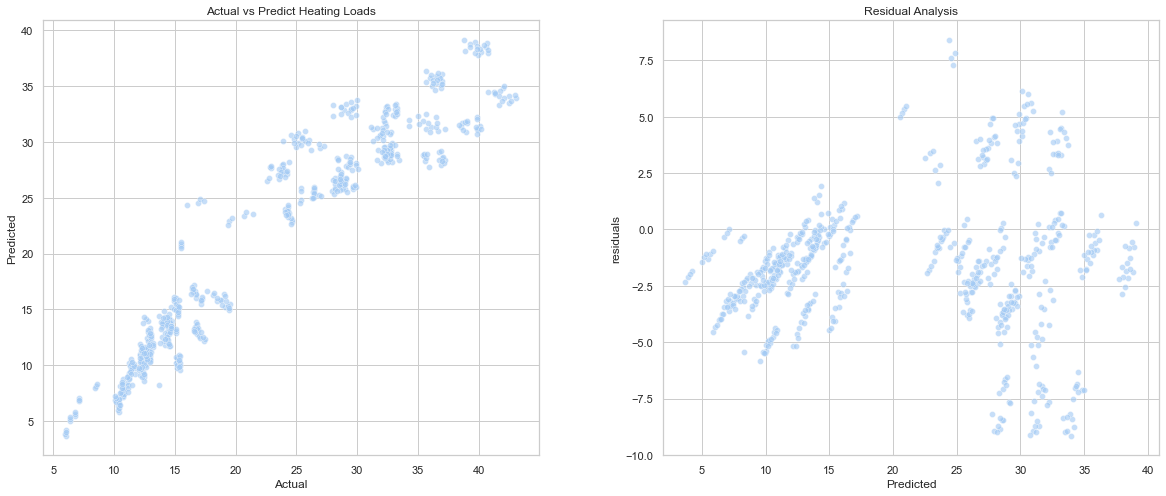

The R2 score for model based on the training data was 0.9326931593367136
The R2 score for model based on the test data was 0.882945053723425


In [4]:
#Heating Regression Model
#Prepare Data
X_heat = df.drop(['Heating_Load', 'Cooling_Load'], axis=1).values
y_heat = df['Heating_Load'].values

#Divide into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_heat, y_heat, test_size=0.8, train_size=0.2, random_state=0)

#Scale train and test features using StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

#Training the Algorithm
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

#Print correlation coeficients of features
#print(model.coef_)

#Make Predictions
y_pred = model.predict(X_test)
df_xtest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_xtest['residuals'] = df_xtest['Predicted'] - df_xtest['Actual']
print("Mean of heating load residuals is " + str(df_xtest['residuals'].mean()))
#Visualize results of prediction vs actual in test set
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.subplots_adjust(hspace=0.25, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

sns.scatterplot(data=df_xtest, x=df_xtest['Actual'], y=df_xtest['Predicted'], alpha=0.6, ax=axes[0]).set_title("Actual vs Predict Heating Loads")
sns.scatterplot(data=df_xtest, x=df_xtest['Predicted'], y=df_xtest['residuals'], alpha=0.6, ax=axes[1]).set_title('Residual Analysis')
plt.show()

#Evaluate Model
print("The R2 score for model based on the training data was " + str(model.score(X_train, y_train)))
print("The R2 score for model based on the test data was " + str(model.score(X_test, y_test)))

Mean of cooling load residuals is -1.567565120357049


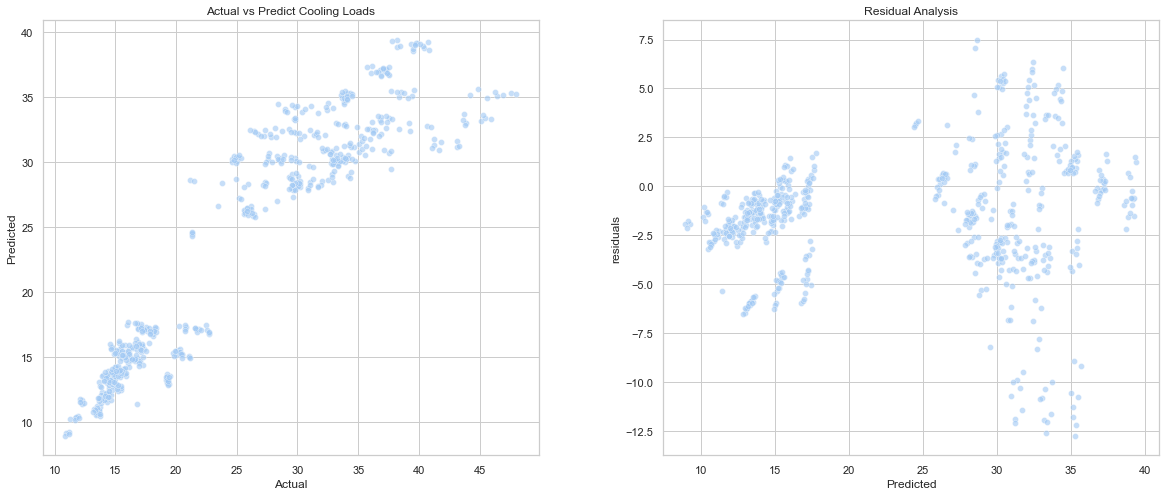

The R2 score for model based on the training data was 0.8904747119738085
The R2 score for model based on the test data was 0.8566323805158483


In [5]:
#Heating Regression Model
#Prepare Data
X_cool = df.drop(['Heating_Load', 'Cooling_Load'], axis=1).values
y_cool = df['Cooling_Load'].values

#Divide into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_cool, y_cool, test_size=0.8, train_size=0.2, random_state=0)

#Scale train and test features using StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

#Training the Algorithm
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

#Print correlation coeficients of features
#print(model.coef_)

#Make Predictions
y_pred = model.predict(X_test)
df_xtest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_xtest['residuals'] = df_xtest['Predicted'] - df_xtest['Actual']
print("Mean of cooling load residuals is " + str(df_xtest['residuals'].mean()))
#Visualize results of prediction vs actual in test set
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.subplots_adjust(hspace=0.25, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

sns.scatterplot(data=df_xtest, x=df_xtest['Actual'], y=df_xtest['Predicted'], alpha=0.6, ax=axes[0]).set_title("Actual vs Predict Cooling Loads")
sns.scatterplot(data=df_xtest, x=df_xtest['Predicted'], y=df_xtest['residuals'], alpha=0.6, ax=axes[1]).set_title('Residual Analysis')
plt.show()

#Evaluate Model
print("The R2 score for model based on the training data was " + str(model.score(X_train, y_train)))
print("The R2 score for model based on the test data was " + str(model.score(X_test, y_test)))